# Rで学ぶ統計学入門

# 10.　一般化線形モデル（GLM）


21世紀になり新しい大きな流れが主流となってきた  

**一般化線形モデル**（generalized linear model; GLM）

## 10・1　応答変数、説明変数、線形予測子

GLMのモデルは一般に、現象の結果と想定されるデータを**応答変数**($y$)、原因と想定されるデータを**説明変数**($x1, x2, …, xk$)とよぶ

GLMのモデルの形式は、一般に以下のように表される

$$f(y)=\beta_0+\beta_1x_1+\beta_2x_2+…+\varepsilon$$

>左辺$f(y)$　　　　：応答変数の**リンク関数**（link function）  
>右辺　　　　　　：**線形予測子**（linear predictor）  
>係数$\beta_0$　　　　　：**切片**（intercept）  
>係数$\beta_0, \beta_1, \beta_2…$：**傾き**（slope）

## 10・2　ロジスティック回帰の考え方

ロジスティック回帰は、二項分布にしたがう上限のあるカウントデータ（0以上の整数）に適用される

二項分布の確率分布は以下のように定義される

$$P(y|n, q)=_nC_yq^y(1-q)^{n-y}$$

GLMを用いて解析することの目標は、ある説明変数$x$に対し二項分布のパラメーター$q$を推定することである

GLMでは、二項分布のリンク関数$f(q)$として、ロジットリンク関数を指定する

ロジットリンク関数を説明する前に、ロジスティック関数を説明する  
ロジスティック関数は一般に以下の形式になっている

$$q=logistic(z)=\frac{1}{1-exp(-z)}$$

>$z$：個々のデータ$x_i$に対しての線形予測子

説明変数が1種類の場合、$z$は

$$z_i=f(q)=\beta_0+\beta_1x_1$$

ロジスティック関数を描画してみる  
$\beta_0=0, \beta_1=2$を基準として、パラメーター値を変化させる

In [53]:
options(repr.plot.width=3.5, repr.plot.height=3)

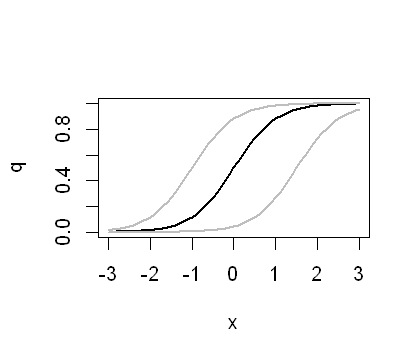

In [54]:
# figure 10.1 (a)
x <- seq(-3,3, 0.1)
b1 <- 2
b0 <- 0
q1 <- 1/(1+exp(-(b0 + b1*x)))
plot(x, q1, xlim=c(-3, 3), ylim=c(0, 1.0), xlab="x", ylab="q", type="l", lwd=2)
b0 <- 2
q2 <- 1/(1+exp(-(b0 + b1*x)))
lines(x, q2, lwd=2, col="grey")
b0 <- -3
q3 <- 1/(1+exp(-(b0 + b1*x)))
lines(x, q3, lwd=2, col="grey")

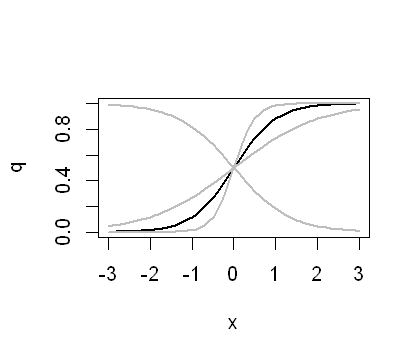

In [55]:
# figure 10.1 (b)
x <- seq(-3,3, 0.1)
b1 <- 2
b0 <- 0
q1 <- 1/(1+exp(-(b0 + b1*x)))
plot(x, q1, xlim=c(-3, 3), ylim=c(0, 1.0), xlab="x", ylab="q", type="l", lwd=2)
b1 <- 1
q2 <- 1/(1+exp(-(b0 + b1*x)))
lines(x, q2, lwd=2, col="grey")
b1 <- 4
q3 <- 1/(1+exp(-(b0 + b1*x)))
lines(x, q3, lwd=2, col="grey")
b1 <- -1.5
q4 <- 1/(1+exp(-(b0 + b1*x)))
lines(x, q4, lwd=2, col="grey")

次にリンク関数を説明する  
ロジスティック関数を変形すると以下のようになり、左辺をロジット関数$logit(q_i)$とよぶ

$$log\frac{q_i}{1-q_i}=z_i$$

ロジット関数はロジスティック関数の逆関数

線形予測子とロジスティック関数$z_i=\beta_0+\beta_1x_1$を関連づけるのがリンク関数

ロジスティック関数のリンク関数はロジットリンク関数となる

**リンク関数を設定する理由**：  
説明変数がどんな値であっても二項分布のパラメーター$q$を$0\le q\le 1$の範囲におさめることができる  
後述する最尤推定法による$q$の推定が容易になる

## 10・3　ポアソン回帰の考え方

ポアソン回帰を説明する

これは上限のないカウントデータ（0以上の整数、非負の整数ともいう）を対象とする

  
    
    
たとえば
* 母ブタの体重と産まれた1腹の産仔数の関係
* ある植物の1株の体サイズとしゅしすうの関係に施肥の効果があるか否かの分析
* いくつもの調査地に生息する植物種数を土壌の水分含量で分析する場合

ポアソン分布を説明する

実数の定数$\lambda(>0)$に対して、$0$以上の整数を値とする確率変数$x$の確率分布が以下の式で表されるとき、$x$は平均値$\lambda$のポアソン分布に従う

$$P(x)=\frac{\lambda^x}{x!}e^{-\lambda}$$

たとえば、  
“平均して1分間に1回起こる不規則なランダム現象は、5分間に何回起こるのかの分布を求めよ”  
の問題を解くため、ポアソン分布を描画してみる

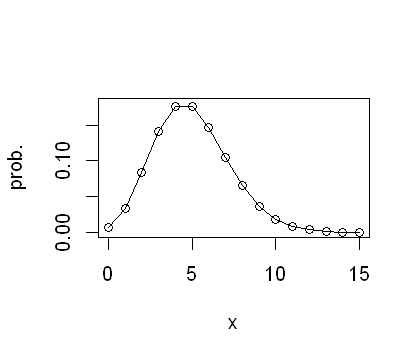

In [56]:
# figure 10.2 (a)
x <- seq(0, 15, 1)
prob <- dpois(x, lambda=5)
plot(x, prob, type="o", xlim=c(0, 15), ylim=c(0, 0.18), xlab="x", ylab="prob.")

5分間に2回起こる確率は…

In [57]:
dpois(2, lambda = 5)

[1] 0.08422

5分間に6回起こる確率は…

In [58]:
dpois(6, lambda = 5)

[1] 0.1462

さまざまな平均値$\lambda(=1, 3, 5, 7)$のポアソン分布を示す

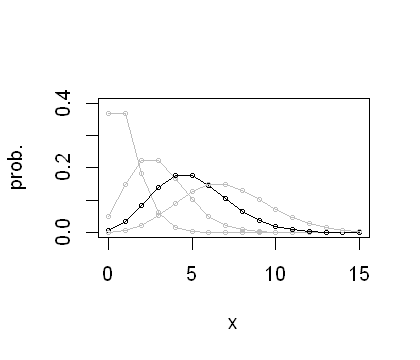

In [59]:
# figure 10.2(b)
x <- seq(0, 15, 1)
freq1 <- dpois(x, lambda=1)
plot(x, freq1, xlim=c(0, 15), ylim=c(0, 0.4), type="o", col="grey", xlab="x", ylab="prob.", cex=0.5)
freq2 <- dpois(x, lambda=3)
lines(x, freq2, type="o", col="grey", cex=0.5)
freq3 <- dpois(x, lambda=5)
lines(x, freq3, type="o", cex=0.5)
freq4 <- dpois(x, lambda=7)
lines(x, freq4, type="o", col="grey", cex=0.5)

ポアソン分布の平均と分散はともに$\lambda$に等しいという重要な性質をもっているので、平均値$\lambda$が決まれば分散も等しく決まる

$$E(x)=Var(x)=\lambda$$

このようなポアソン分布をベースにしたポアソン回帰の概念図を示す

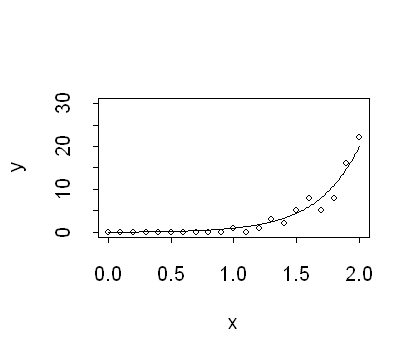

In [60]:
# figure 10.3
x <- seq(0, 2, 0.01)
y <- exp(3*x-3)
dx <- seq(0, 2, 0.1)
dy <- rpois(length(dx), lambda=exp(3*dx-3))
plot(x, y, type="l", xlim=c(0, 2), ylim=c(0, 30), tcl=-0.2)
points(dx, dy, cex=0.7)

従来は、このデータに通常の直線回帰を適用した例がみられたこともあったが、負の$y$の値も考慮されたモデルであり、分散も一定であるため、**モデルの適用としては誤り**である

よって、負には決してならないポアソン分布を使って、上限のないカウントデータ（0以上の自然数）に対してGLMでポアソン回帰を実行し、モデルを適合させる必要がある

たとえば、体重が$x_i$ある母ブタの個体$i$の1腹の産仔数$y_i$は、体重$x_i$によって決まる産仔数平均値$\lambda_i$のポアソン分布に従うことが考えられる

$$P(y_i|\lambda_i)=\frac{\lambda_i^{y_i}}{y_i!}e^{-\lambda_i}$$

体重が$x_i$である母ブタの個体$i$の産仔数$y_i$は、産仔数平均値$\lambda_i$で決まるポアソン分布に従う事象（0以上の整数）、ということ

ここで線形予測子とポアソン分布のパラメーターの関係を以下のようにしてみる

$$\lambda_i=exp(\beta_0+\beta_1x_i)$$

両辺で対数をとると、以下のようになる

$$\log\lambda_i=\beta_0+\beta_1x_i$$

右辺は線形予測子、左辺は対数リンク関数

要点をまとめると・・・表10.1（教科書）

## 10・4　ロジスティック回帰の例

ある害虫種に対して殺虫剤を噴霧するとき、その濃度の効果を調べた架空のデータ

In [61]:
(d <- read.csv("table10-2.csv"))

dose,dead,live
1.0,0,1
1.3,0,1
1.7,0,1
2.2,0,1
2.4,0,1
2.8,0,1
3.1,1,0
3.5,1,0
3.7,0,1
4.2,0,1


>dose：殺虫剤濃度  
>dead：死亡（1）  
>live：生存（2）

濃度が上がるにつれて、縦軸の死亡率が高まる傾向

二項分布を仮定したロジスティック回帰を実施してみる

In [62]:
result <- glm(cbind(d$dead, d$live) ~ d$dose, family=binomial(logit))
(summary(result) -> sresult)


Call:
glm(formula = cbind(d$dead, d$live) ~ d$dose, family = binomial(logit))

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.700  -0.466  -0.173   0.564   1.687  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   -5.650      2.663   -2.12    0.034 *
d$dose         1.452      0.653    2.22    0.026 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 23.508  on 16  degrees of freedom
Residual deviance: 13.564  on 15  degrees of freedom
AIC: 17.56

Number of Fisher Scoring iterations: 5


切片$\beta_0$

In [63]:
sresult$coefficients[1,1]

[1] -5.65

傾き$\beta_1$

In [64]:
sresult$coefficients[2,1]

[1] 1.452

切片$\beta_0$の有意確率

In [65]:
sresult$coefficients[1,4]

[1] 0.03387

傾き$\beta_1$の有意確率

In [66]:
sresult$coefficients[2,4]

[1] 0.0261

このロジスティック回帰の曲線を描く

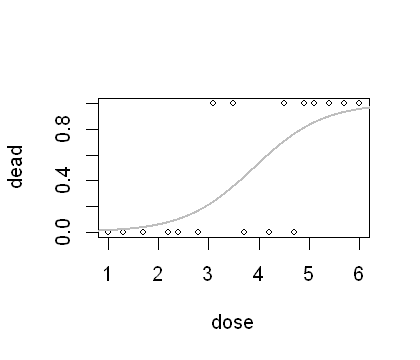

In [67]:
# figure 10.4
plot(d$dead ~ d$dose, xlab="dose", ylab="dead", xlim=c(1, 6), ylim=c(0, 1), cex=0.7)
pred.dose <- seq(0, 7.0, 0.01)
pred.dead <- 1/(1+exp(-(result$coefficient[1] + result$coefficient[2]*pred.dose)))
lines(pred.dose, pred.dead, lwd=2, col="grey")

## 10・5　ポアソン回帰の例

ポアソン回帰の例として、ある園芸植物$M$の球根の重さと春になって咲いた花の数を考えてみる

In [68]:
(d <- read.csv("table10-3.csv"))

wt,flw
17.3,1
18.5,2
20.5,0
21.2,3
20.8,0
21.5,1
22.1,1
22.7,0
22.6,3
23.3,1


このデータにポアソン回帰を実行し、最も適合する曲線を描く


Call:
glm(formula = d$flw ~ d$wt, family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1598  -0.9020  -0.0429   0.7283   1.6042  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0434     0.4707   -2.22    0.027 *  
d$wt          0.0833     0.0154    5.41  6.4e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 72.866  on 41  degrees of freedom
Residual deviance: 42.115  on 40  degrees of freedom
AIC: 169.7

Number of Fisher Scoring iterations: 5


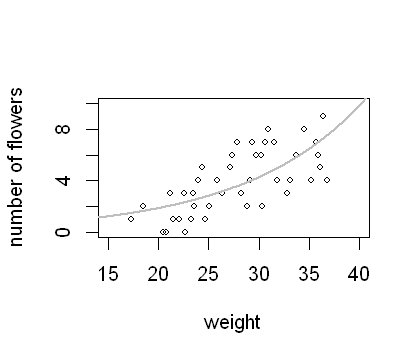

In [69]:
result <-glm(d$flw ~ d$wt, family=poisson)
(summary(result) -> sresult)

# figure 10.5
plot(d$wt, d$flw, xlab="weight", ylab="number of flowers", xlim=c(15, 40), ylim=c(0, 10), cex=0.7)
x.wt <- seq(12, 45, 0.1)
y.flw <- exp(result$coefficient[1]+result$coefficient[2]*x.wt) 
lines(x.wt, y.flw, col="grey", lwd=2) 

切片$\beta_0$

In [70]:
sresult$coefficients[1,1]

[1] -1.043

傾き$\beta_1$

In [71]:
sresult$coefficients[2,1]

[1] 0.08327

切片$\beta_0$の有意確率

In [72]:
sresult$coefficients[1,4]

[1] 0.02663

傾き$\beta_1$の有意確率

In [73]:
sresult$coefficients[2,4]

[1] 6.381e-08

ただし、過分散を注意しておく

[Residual deviance]/[df]の比が1よりもかなり大きければ（1.5以上が目安）過分散となり、1よりもかなり小さければ均等分布となる

この例での比

In [74]:
sresult$deviance/sresult$df[2]

[1] 1.053

≒1なのでポアソン回帰を実施してよい

## 10・6　尤度とは何か？

**尤度**（likelihood）という概念を導入する

尤度は“尤もらしさ”を定量的に示すもの

仮にポアソン分布で平均値$\lambda=2$だとして、データが$(y_1, y_2, y_3, y_4)=(2, 2, 3, 4)$が発生する確率を考える

その確率は$P(y_1=2|\lambda=2)\times P(y_2=2|\lambda=2)\times P(y_3=3|\lambda=2)\times P(y_4=4|\lambda=2)$となる

In [75]:
y <- 0:9
p <- dpois(y, lambda = 2)
options(digits = 4)
p

[1] 0.1353353 0.2706706 0.2706706 0.1804470 0.0902235 0.0360894 0.0120298
 [8] 0.0034371 0.0008593 0.0001909

In [76]:
y <- c(2,2,3,4)
prod(dpois(y, lambda =2))

[1] 0.001193

これが$(y_1, y_2, y_3, y_4)=(2, 2, 3, 4)$という観測値が得られたときの$\lambda=2$の尤度である

これをいろいろな\lambdaに関して計算すると、尤度がさまざま得られる

われわれが知りたいのは、最もあてはまりがよくなる、すなわち最も尤度が大きくなるパラメーターの値は何か、である

一般に、尤度はパラメーターの関数である

$$L(\lambda)=P(y_1|\lambda)xP(y_2|\lambda)x……xP(y_{n-1}|\lambda)xP(y_n|\lambda)$$
$$=\prod_{i=1}^nP(y_i|\lambda)=\prod_{i=1}^n\frac{\lambda^{y_i}}{y_i!}e^{-\lambda}$$

この**尤度関数**$L(\lambda)$は、対数変換することで総和に変換することができる

これを**対数尤度**とよぶ

$$\log L(\lambda)=\sum_{i=1}^n(y_i\log \lambda-\lambda-\sum_{k=1}^{y_i}\log k)$$

最大対数尤度をとるパラメーターを求め、パラメーターの最適な推定値とする

これを**最尤推定**（maximum likelihood estimation）や**最尤法**（method of maximum likelihood）とよぶ

対数尤度をパラメーターで偏微分し、その一次微分$=0$とすることで、最大対数尤度をもたらすパラメーターを求めることになる

$$\frac{\partial\log L(\lambda)}{\partial\lambda}=\sum_{i=1}^n\left[\frac{y_i}{\lambda}-1\right]=\frac{1}{\lambda}\sum_{i=1}^ny_i-n$$

右辺$=0$と置けば、以下となる

$$\hat{\lambda}=\frac{1}{n}\sum_{i=1}^ny_i$$

これは$\hat{\lambda}=$算術平均にほかならない

ポアソン分布の場合の最大対数尤度は標本平均で与えられる

$\hat{\lambda}$を**最尤推定値**（maximum likelihood estimator）とよぶ

まとめると、最尤推定とは、対数尤度を最大にするパラメーター（$\hat{\theta}$）を求めることである

一般に、データ集合$Y$に基づく尤度は、パラメーターを$\theta$とすれば以下のように記される

$$L(\theta|Y)==\prod_{i}^nP(y_i|\theta)$$

対数尤度は

$$\log L(\theta)==\sum_{i=1}^n\log P(y_i|\theta)$$

となる

以上の関係を図で説明する

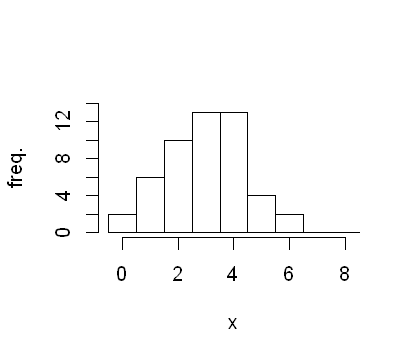

In [77]:
l <- 3
d <- rpois(50, lambda=l)
hist(d, ylim=c(0, 14), breaks=c(-0.5:8.5), xlab="x", ylab="freq.", main="")

ポアソン乱数を使った仮想データセットから描いた頻度分布のデータセット

標本平均（$\bar{X}$）は

In [78]:
mean(d)

[1] 2.98

これに、さまざまな平均値パラメーター$\lambda$のポアソン分布を適合すると、

$\lambda=2……\log L=$

In [79]:
logL <- function(m) sum(dpois(d, m, log=T))
logL(2)

[1] -100.6

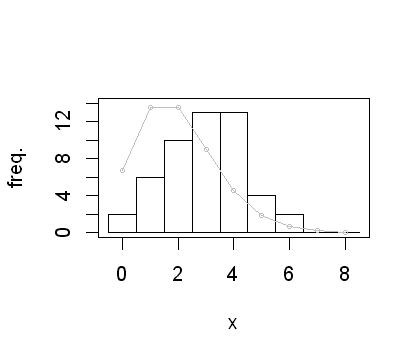

In [80]:
# figure 10.6 (a)
hist(d, ylim=c(0, 14), breaks=c(-0.5:8.5), xlab="x", ylab="freq.", main="")
par(new=T)
x <- seq(0, 8, 1)
y <- 50*dpois(x, lambda=2) 
plot(x, y, xlab="", ylab="", xlim=c(-0.5, 8.5), ylim=c(0, 14), type="o", col="grey", cex=0.5)

$\lambda=3……\log L=$

In [81]:
logL(3)

[1] -90.15

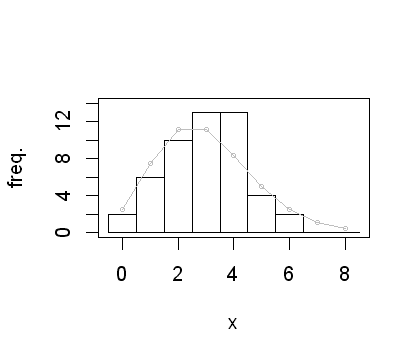

In [82]:
# figure 10.6 (b)
hist(d, ylim=c(0, 14), breaks=c(-0.5:8.5), xlab="x", ylab="freq.", main="")
par(new=T)
x <- seq(0, 8, 1)
y <- 50*dpois(x, lambda=3) 
plot(x, y, xlab="", ylab="", xlim=c(-0.5, 8.5), ylim=c(0, 14), type="o", col="grey", cex=0.5)

$\lambda=3.5……\log L=$

In [83]:
logL(3.5)

[1] -92.19

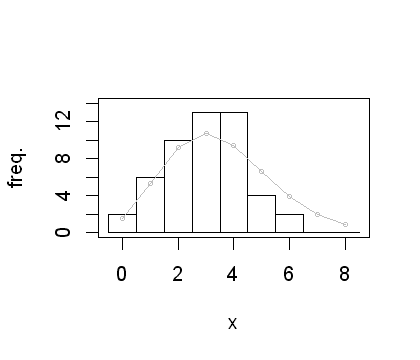

In [84]:
# figure 10.6 (c)
hist(d, ylim=c(0, 14), breaks=c(-0.5:8.5), xlab="x", ylab="freq.", main="")
par(new=T)
x <- seq(0, 8, 1)
y <- 50*dpois(x, lambda=3.5) 
plot(x, y, xlab="", ylab="", xlim=c(-0.5, 8.5), ylim=c(0, 14), type="o", col="grey", cex=0.5)

$\lambda=4……\log L=$

In [85]:
logL(4)

[1] -97.29

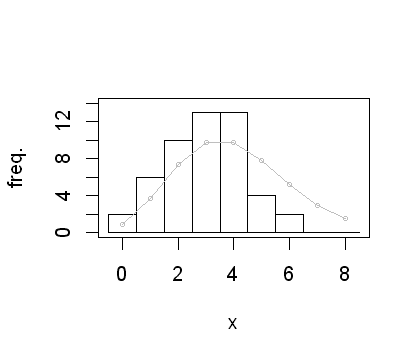

In [86]:
# figure 10.6 (d)
hist(d, ylim=c(0, 14), breaks=c(-0.5:8.5), xlab="x", ylab="freq.", main="")
par(new=T)
x <- seq(0, 8, 1)
y <- 50*dpois(x, lambda=4) 
plot(x, y, xlab="", ylab="", xlim=c(-0.5,8.5), ylim=c(0, 14), type="o", col="grey", cex=0.5)

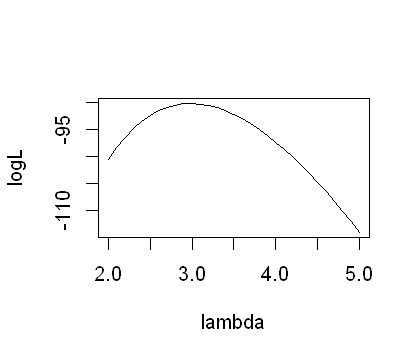

In [87]:
# figure 10.7 
lambda <- seq(2, 5, 0.1)
plot(lambda, sapply(lambda, logL), type="l", xlim=c(2, 5), xlab="lambda", ylab="logL")

標本平均$\bar{X}$にぴったりの$\lambda$のときに、対数尤度が最大値になっている

尤度の最大化に基づいて標本のデータセットから目的のパラメーターを推定するのが、最尤推定法の原理

## 10・7　赤池の情報量基準（AIC）

AICは赤池情報量基準（Akaike's information criteria）とよばれるもの

赤池弘次によって考案されたモデル選択の基準であり、いまは世界中で使われている

定義

$$AIC=-2*最大対数尤度+2*最尤推定した自由パラメーターの個数$$

AICを小さくするモデルを“よいモデル”と考える

モデル適合度を最大対数尤度として調べるには、logLik()関数を用いる

殺虫剤のロジスティック回帰の場合

In [88]:
d <- read.csv("table10-2.csv")
result <- glm(cbind(d$dead, d$live) ~ d$dose, family=binomial(logit))
summary(result) -> sresult
logLik(result)

'log Lik.' -6.782 (df=2)

ここからAICを計算

In [89]:
-2*logLik(result)[1]+2*sresult$df[1]

[1] 17.56

園芸植物のポアソン回帰の場合

In [90]:
d <- read.csv("table10-3.csv")
result <-glm(d$flw ~ d$wt, family=poisson)
summary(result) -> sresult
logLik(result)

'log Lik.' -82.85 (df=2)

AICを計算

In [91]:
-2*logLik(result)[1]+2*sresult$df[1]

[1] 169.7

データの当てはまりがよくても、モデルを構成するパラメーター数が多いと、一般的な予測性（汎用性とよぶ）が落ち、AICが大きくなってしまうので、よいモデルではありえない

## 10・8　逸脱度、残差逸脱度、最大逸脱度

**逸脱度**（deviance）

最大対数尤度を$L^*$とすれば、逸脱度$D$は

$$D=-2\log L^*$$

逸脱度は“あてはまりの悪さ”といえる

**ナル逸脱度**（null deviance）

**残差逸脱度**（residual deviance）

表10.4、図10.8参照（教科書）

最小逸脱度は個々のデータを$\lambda_i$としてすべて当てはめたもので、フルモデルとよぶ  
他のどんなモデルよりも最大の対数尤度を発揮する

フルモデルの最大対数尤度

In [92]:
sum(log(dpois(d$flw, lambda = d$flw)))

[1] -61.79

この$D$に$-2$をかけると最小逸脱度

In [93]:
-2*sum(log(dpois(d$flw, lambda = d$flw)))

[1] 123.6

残差逸脱度は「通常のモデルの逸脱度」-「フルモデルの逸脱度」

園芸植物Mの回帰モデルの場合

In [94]:
-2*logLik(result)[1]-(-2*sum(log(dpois(d$flw, lambda = d$flw))))

[1] 42.12

ナル逸脱度はナルモデルの逸脱度を示す

ナルモデルは切片だけのモデル

In [95]:
result <- glm(d$flw ~ 1, family = poisson)
summary(result)


Call:
glm(formula = d$flw ~ 1, family = poisson)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8115  -1.0863   0.0239   0.9561   2.1719  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.3743     0.0776    17.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 72.866  on 41  degrees of freedom
Residual deviance: 72.866  on 41  degrees of freedom
AIC: 198.4

Number of Fisher Scoring iterations: 5


最大逸脱度は

In [96]:
-2*logLik(result)

'log Lik.' 196.4 (df=1)

すべてのデータに沿ったフルモデルのポアソン回帰からの逸脱度の差でみると、切片だけの最大逸脱度（ナル逸脱度）に比べて、植物$M$のポアソン回帰モデルは傾きをもつ分だけ残差逸脱度が小さくなっており、この傾きの効果が大きいほど有意な効果となる

**帰無仮説検定を用いた逸脱度にもとづいたモデルの比較法**

帰無仮説としてパラメーターが切片だけのモデル（ナルモデル）

対立仮説として説明変数を入れた場合のモデル

それぞれの逸脱度に注目し、切片だ$P<\alpha$）のであれば帰無仮説を棄却

**尤度比検定**とよぶ


## 10・9　二つ以上の説明変数をもつときのモデル選択：ロジスティック回帰を事例に

AICを用いたモデル選択を説明

害虫に殺虫剤を4段階の濃度（dose）で噴霧したときの死亡率を、雄と雌で比べる実験

生存は0、死亡は1

雄は1、雌は2

In [97]:
(d <- read.csv("table10-5.csv"))

dose,sex,y
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,1
1,1,1
1,1,1


これをロジスティック回帰で解析する

二つの説明変数が関係するので、交互作用も含めて三つのモデルを想定

(A)殺虫剤の濃度だけで回帰したモデル（doseだけのモデル）  

(B)殺虫剤の濃度と性別のモデル（dose+sexモデル）  

(C)殺虫剤の濃度と性別とその交互作用を含めたモデル（dose+sex+dose:sexモデル）

(A)殺虫剤の濃度だけで回帰したモデル（doseだけのモデル）


Call:
glm(formula = cbind(y, 1 - y) ~ dose, family = binomial(logit), 
    data = d)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.903  -0.921  -0.560   0.974   1.964  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.907      0.725   -4.01  6.1e-05 ***
dose           1.135      0.267    4.25  2.1e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 110.854  on 79  degrees of freedom
Residual deviance:  86.708  on 78  degrees of freedom
AIC: 90.71

Number of Fisher Scoring iterations: 3


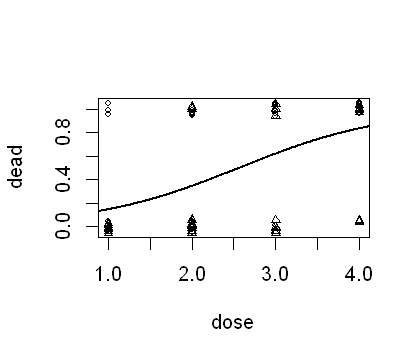

In [98]:
# figure 10.9 (a)
yv <- jitter(d$y, 0.3)
result <- glm(cbind(y, 1-y) ~ dose, family=binomial(logit), data=d)
summary(result)
plot(d$dose, yv, xlab="dose", ylab="dead", xlim=c(1, 4), ylim=c(-0.05, 1.05), pch=c(1, 2)[d$sex], cex=0.7)
pred.dose <- seq(0, 5, 0.01)
pred.ym <- 1/(1+exp(-(result$coefficient[1] + result$coefficient[2]*pred.dose)))
lines(pred.dose, pred.ym, lwd=2, col="black")

(B)殺虫剤の濃度と性別のモデル（dose+sexモデル）  


Call:
glm(formula = cbind(y, 1 - y) ~ dose + sex, family = binomial(logit), 
    data = d)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.905  -0.750  -0.285   0.806   1.978  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.443      0.975   -0.45   0.6495    
dose           1.380      0.321    4.30  1.7e-05 ***
sex           -2.060      0.649   -3.17   0.0015 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 110.854  on 79  degrees of freedom
Residual deviance:  74.236  on 77  degrees of freedom
AIC: 80.24

Number of Fisher Scoring iterations: 5


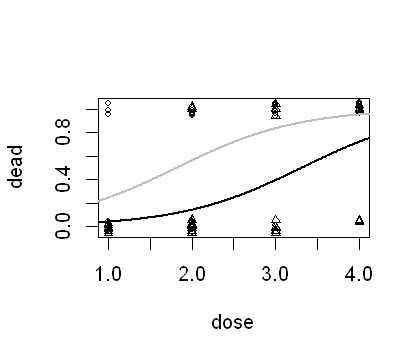

In [99]:
# figure 10.9 (b)
result <- glm(cbind(y, 1-y) ~ dose + sex, family=binomial(logit), data=d)
summary(result)
plot(d$dose, yv, xlab="dose", ylab="dead", xlim=c(1, 4), ylim=c(-0.05, 1.05), pch=c(1, 2)[d$sex], cex=0.7)
pred.dose <- seq(0, 5, 0.01)
pred.ym <- 1/(1+exp(-(result$coefficient[1] + result$coefficient[2]*pred.dose + result$coefficient[3]*1)))
pred.yf <- 1/(1+exp(-(result$coefficient[1] + result$coefficient[2]*pred.dose + result$coefficient[3]*2)))
lines(pred.dose, pred.ym, lwd=2, col="grey")
lines(pred.dose, pred.yf, lwd=2, col="black")

(C)殺虫剤の濃度と性別とその交互作用を含めたモデル（dose+sex+dose:sexモデル）


Call:
glm(formula = cbind(y, 1 - y) ~ dose + sex + dose:sex, family = binomial(logit), 
    data = d)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.907  -0.750  -0.286   0.807   1.976  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.46567    2.48159   -0.19     0.85
dose         1.38961    1.00878    1.38     0.17
sex         -2.04388    1.75637   -1.16     0.24
dose:sex    -0.00629    0.64177   -0.01     0.99

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 110.854  on 79  degrees of freedom
Residual deviance:  74.236  on 76  degrees of freedom
AIC: 82.24

Number of Fisher Scoring iterations: 5


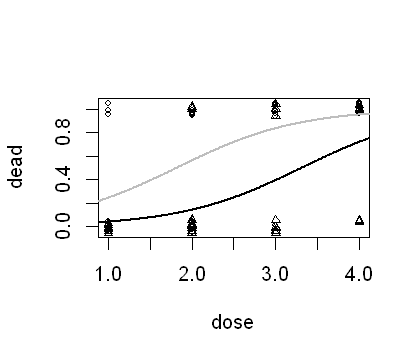

In [100]:
# figure 10.9 (c)
result <- glm(cbind(y, 1-y) ~ dose + sex + dose:sex, family=binomial(logit), data=d)
summary(result)
plot(d$dose, yv, xlab="dose", ylab="dead", xlim=c(1, 4), ylim=c(-0.05, 1.05), pch=c(1, 2)[d$sex], cex=0.7)
pred.dose <- seq(0, 5, 0.01)
pred.ym <- 1/(1+exp(-(result$coefficient[1] + result$coefficient[2]*pred.dose + result$coefficient[3]*1 + result$coefficient[4]*1*pred.dose)))
pred.yf <- 1/(1+exp(-(result$coefficient[1] + result$coefficient[2]*pred.dose + result$coefficient[3]*2 + result$coefficient[4]*2*pred.dose)))
lines(pred.dose, pred.ym, lwd=2, col="grey")
lines(pred.dose, pred.yf, lwd=2, col="black")

つのモデルを比較すると、

(A)殺虫剤の濃度だけで回帰したモデル（doseだけのモデル  
・・・AIC：90.708

(B)殺虫剤の濃度と性別のモデル（dose+sexモデル）  
・・・AIC：80.236

(C)殺虫剤の濃度と性別とその交互作用を含めたモデル（dose+sex+dose:sexモデル）  
・・・AIC：82.236

AICが最小となるのは、モデル(B)

粕谷は、AICは“正しいモデル”を選ぶための指標ではないことを指摘している

“AICは平均的な予測がよいモデルを相対的に選ぶものであり、AIC最小のモデルが真のモデルとどれだけ確実に一致しているか、あるいは、他のモデルが確実に否定されるかを述べているわけではない”

## 10・10　GLMにおけるオフセットの利用

ポアソン回帰の目的変数になる事象の回数や個数は、どれだけの時間や広さを調査したかによって意味が異なることがある

たとえば、$t$時間観測したら事象が$y$回起こったとして、時間当たりの事象が起こった回数$(y/t)$に対する説明変数$x$の影響を分析したい

回帰式のモデルは、

$$\log\left(\frac{y}{t}\right)=\beta_0+\beta_1x$$

変形すると、

$$\log y=\beta_0+\beta_1x+\log t$$

$\log t$の係数は$1$なので、観察時間$t$の効果をうまく表すことができている

この$\log t$をオフセットとよぶ

オフセットの事例として面積を考え、林の水たまりに生える水草$Q$を想定する

個々の水たまりの面積に対して何株生えていたのかの本数を調査し、光環境によって差が出るのか調べたい

In [101]:
(d <- read.csv("table10-6.csv"))

light,plants,w_area
3500,4,6.5
2300,2,7.3
700,2,12.3
500,0,4.3
2900,4,17.5
2300,3,13.1
1200,1,8.1
900,2,13.7
300,0,4.3
2500,4,15.2


面積をオフセット、光の照度を説明変数としてポアソン回帰に組み込む


Call:
glm(formula = plants ~ light, family = poisson, data = d, offset = log(w_area))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1205  -0.6817  -0.0095   0.3544   0.7219  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.715225   0.491061   -5.53  3.2e-08 ***
light        0.000527   0.000173    3.04   0.0024 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 15.5631  on 14  degrees of freedom
Residual deviance:  5.6669  on 13  degrees of freedom
AIC: 41.04

Number of Fisher Scoring iterations: 4


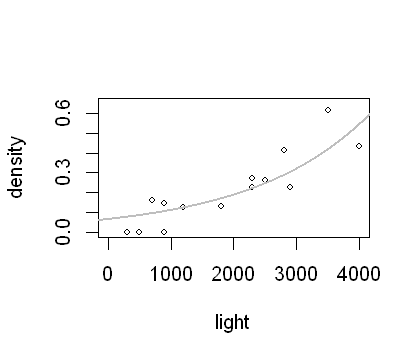

In [102]:
result <- glm(plants ~ light, offset=log(w_area), family=poisson, data=d)
summary(result)
# figure 10.10
plot(d$plants/d$w_area ~ d$light, xlab="light", ylab="density", xlim=c(0, 4000), ylim=c(0, 0.65), cex=0.7)
pred.light <- seq(-200, 4200, 0.1)
pred.y <- exp(result$coefficient[1] + result$coefficient[2]*pred.light)
lines(pred.light, pred.y, lwd=2, col="grey")

水たまりの面積がオフセットになり、光の照度が説明変数となって係数に表れている

## まとめ

GLMは統計学の初心者にとっては、難易度が高い内容だろう

そのため、学生や統計にうとい研究者によってはGLMの使用を躊躇したり、ときには正規分布の扱いが不適切な場合でも、無理やり回帰直線を引こうとする姿がしばしば見られる

しかし、この第10章と第11章でGLMを勉強してもらえれば、恐るるに足らずである